# Laboratorio 1  
## Mineria de Datos - Seccion 20  
### Grupo 3: Andrés de la Roca y Jun Woo Lee

In [211]:
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import timedelta
from datetime import datetime

from quickda.explore_data import *
from quickda.clean_data import *
from quickda.explore_numeric import *
from quickda.explore_categoric import *
from quickda.explore_numeric_categoric import *
from quickda.explore_time_series import *
import nbformat
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [212]:
baseballdata = pd.read_csv('baseball_reference_2016_scrape.csv')

## Limpieza de las variables

(Ademas de algunos reemplazos de valores faltantes)

In [213]:
#Limpiando la variable attendance
baseballdata['attendance'] = baseballdata["attendance"].str.split('\'').str[0]
attendanceArray = []
for item in baseballdata['attendance']:
        try:
            attendanceArray.append(int(item.replace(',', '')))
        except:
            attendanceArray.append(None) #En caso de encontrar valores erroneos

        
baseballdata['attendance'] = attendanceArray

#Limpiando la variable game_duration
baseballdata['game_duration'] = baseballdata['game_duration'].str.split(': ').str[1]
game_durationArray = []
for item in baseballdata['game_duration']:
    try:
        hours = item.split(":")[0]
        minutes = item.split(":")[1]
        hours = int(hours)
        minutes = int(minutes)
        delta = timedelta(hours=hours, minutes=minutes)
        total_seconds = delta.total_seconds()
        minutes = int(total_seconds // 60)
        game_durationArray.append(minutes)
    except:
        game_durationArray.append(None)

baseballdata['game_duration'] = game_durationArray
baseballdata = clean(baseballdata, method='outliers', columns=['game_duration'])

#Limpiando la variable date para solo guardar dia de la semana
baseballdata['date'] = baseballdata['date'].str.split(',').str[0]

#Limpiando la variable start_time (Hora de inicio)
baseballdata['start_time'] = baseballdata['start_time'].str.split('e: ').str[1]
baseballdata['start_time'] = baseballdata['start_time'].str.replace(".", "")
baseballdata['start_time'] = baseballdata['start_time'].str.split(' L').str[0]

start_timeArray = []
for item in baseballdata['start_time']:
    formato = '%I:%M %p'
    item = datetime.strptime(item, formato).time()
    item = item.hour
    start_timeArray.append(item)
baseballdata['start_time'] = start_timeArray

#Limpiando la variable venue (Estado o lugar del partido)
baseballdata['venue'] = baseballdata['venue'].str.split(': ').str[1] #FIX ME
venueArray = []
for item in baseballdata['venue']:
    if len(item) < 5:
        venueArray.append(None)
    else:
        venueArray.append(item)
baseballdata['venue'] = venueArray



#Limpieza de las demas variables para que tengan un tipo estandarizado
columns2Delete = ['other_info_string', 'field_type', 'boxscore_url', 'away_team_errors', 
'home_team_errors', 'away_team_hits', 'away_team_runs', 'home_team_hits', 'home_team_runs', 'venue']
baseballdata = clean(baseballdata, method='dropcols', columns = columns2Delete)
to_int = ['attendance', 'game_duration']
baseballdata = clean(baseballdata, method='dtypes', columns=to_int, dtype='int32')
to_categoric = ["away_team", "home_team", "game_type", 'date']
baseballdata = clean(baseballdata, method='dtypes', columns=to_categoric, dtype='string')

C:\Users\Andre\AppData\Local\Temp\ipykernel_16052\3944057157.py:37: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



#### Estandarizar los nombres de las columnas:

In [214]:
baseballdata = clean(baseballdata, method = "standardize")

#### Reemplazar valores faltantes

In [215]:
baseballdata = clean(baseballdata, columns="game_type", method="fillmissing")
baseballdata = clean(baseballdata, columns="attendance", method="fillmissing") #Reemplazo de valores None (Faltantes)
baseballdata = baseballdata.astype({'attendance':'int'})
baseballdata = clean(baseballdata, columns="game_duration", method="fillmissing") #Reemplazo de valores None (Faltantes)
baseballdata = baseballdata.astype({'game_duration':'int'})
baseballdata = clean(baseballdata, columns='start_time', method='fillmissing')
baseballdata = clean(baseballdata, columns='venue', method='fillmissing')
baseballdata = clean(baseballdata, columns='start_time', method='fillmissing') #FIX ME


## Resumen de la data (pandas_profiling)

In [216]:
# explore(baseballdata, method='profile', report_name="Baseball data report", is_large_dataset=False)

## Resumen de la data (QuickDA!)

In [217]:
explore(baseballdata, method="summarize")

C:\Users\Andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\quickda\explore_data.py:27: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\Andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\quickda\explore_data.py:28: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\Andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\quickda\explore_data.py:29: FutureWarning:

The default value of numeric_only in 

,dtypes,count,null_sum,null_pct,nunique,min,25%,50%,75%,max,mean,median,std,skew
attendance,int32,2389,0,0.0,2308,8766,22288.0,30486.0,38296.0,54449,30290.934701,30486.0,9862.519439,-0.049769
away_team,object,2389,0,0.0,30,Arizona Diamondbacks,-,-,-,Washington Nationals,-,-,-,-
date,object,2389,0,0.0,7,Friday,-,-,-,Wednesday,-,-,-,-
game_duration,int32,2389,0,0.0,119,122,167.0,181.0,197.0,245,182.412725,181.0,21.895529,0.284566
game_type,object,2389,0,0.0,4,"Day Game, on grass",-,-,-,"Night Game, on turf",-,-,-,-
home_team,object,2389,0,0.0,30,Arizona Diamondbacks,-,-,-,Washington Nationals,-,-,-,-
start_time,int64,2389,0,0.0,11,11,13.0,19.0,19.0,21,17.057346,19.0,2.707173,-0.833358


## Exploracion de los datos

### Variables numericas en general

Outlier Analysis - Boxplot


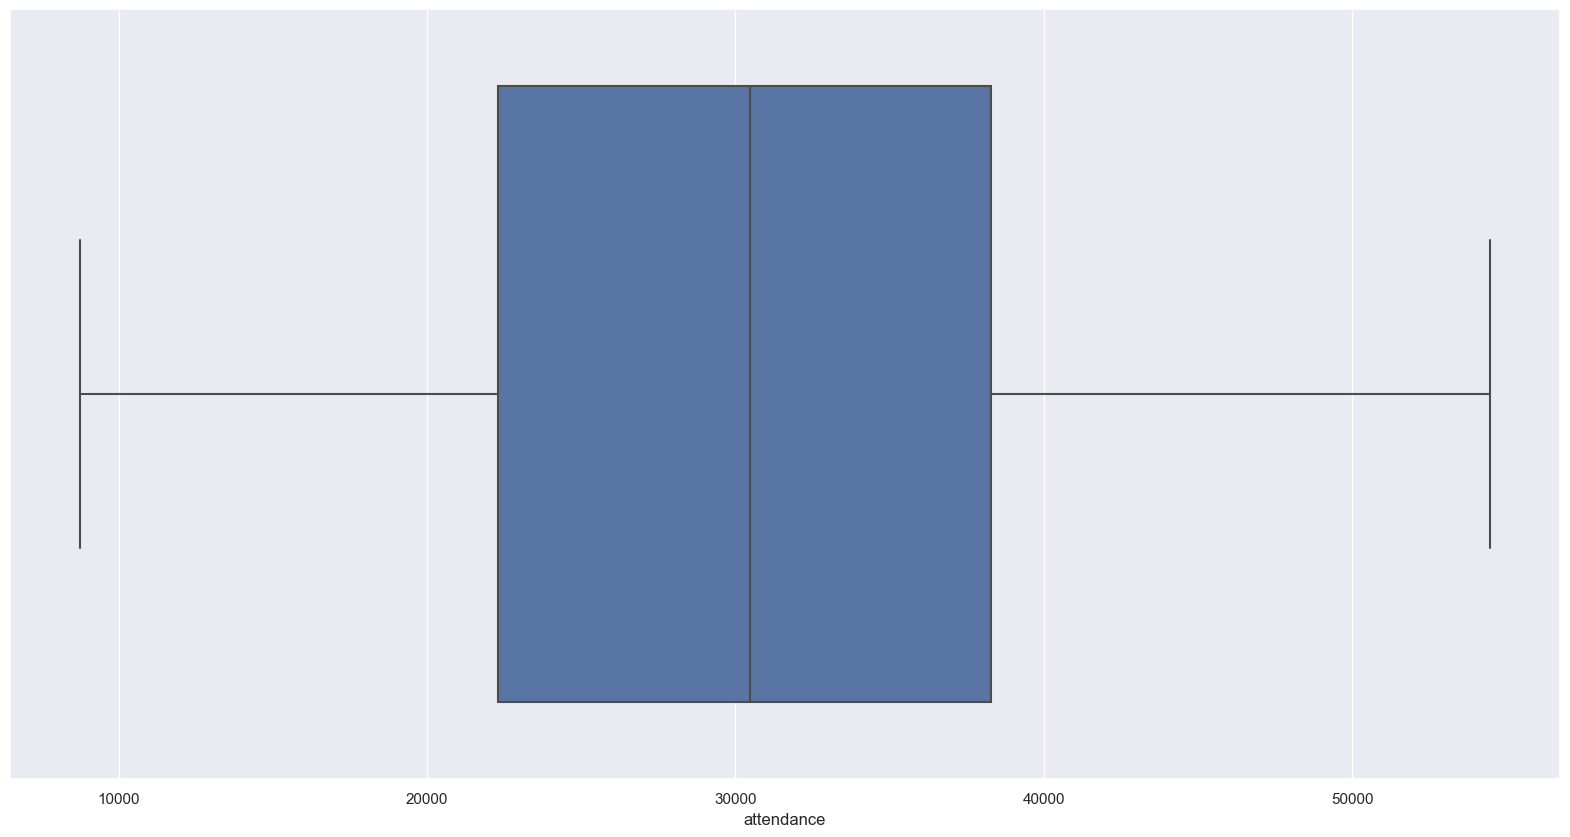

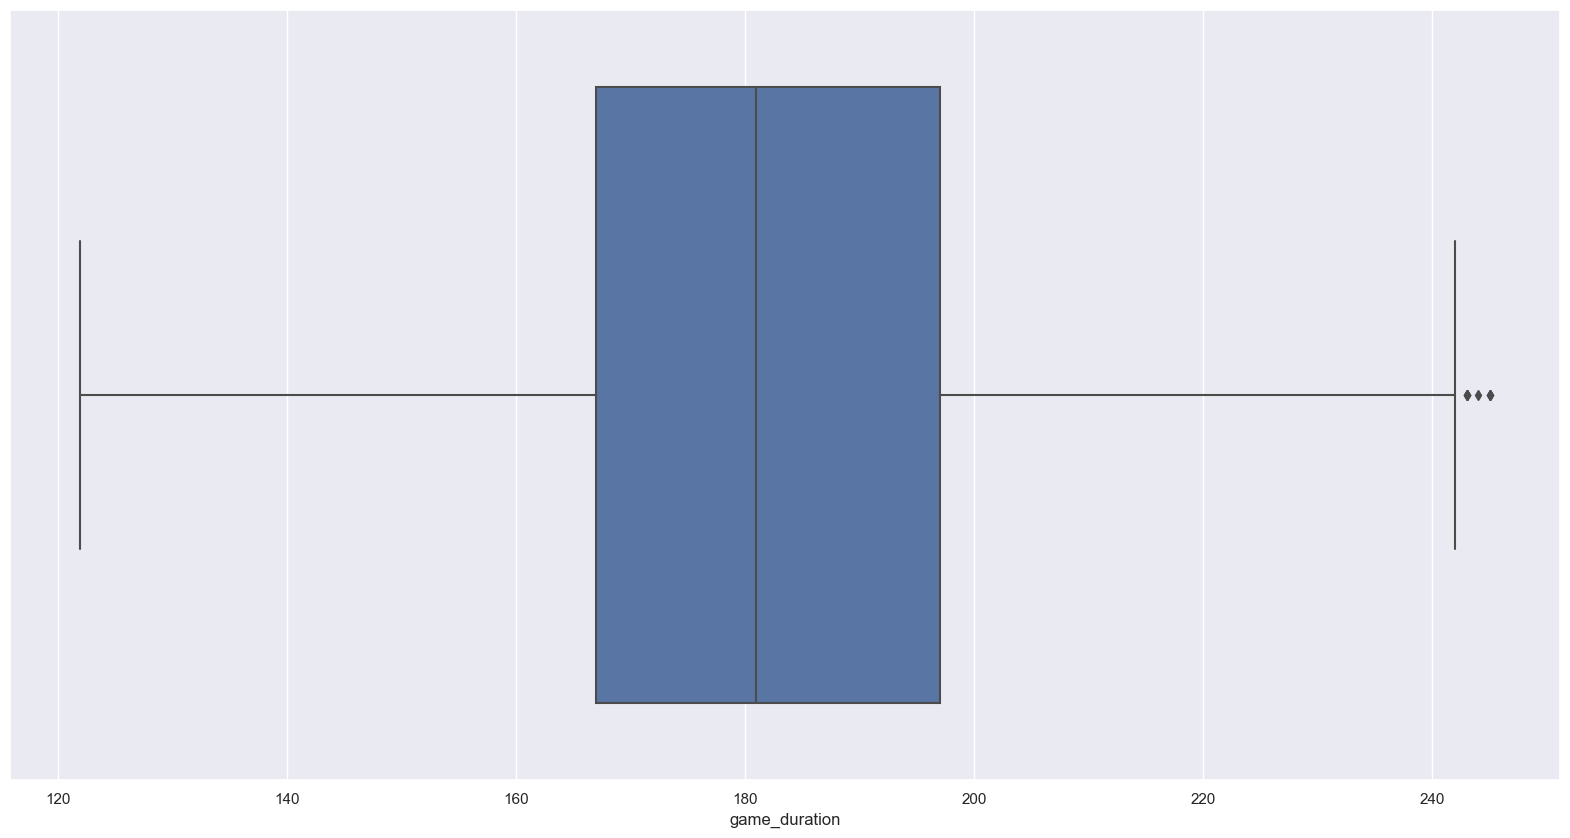

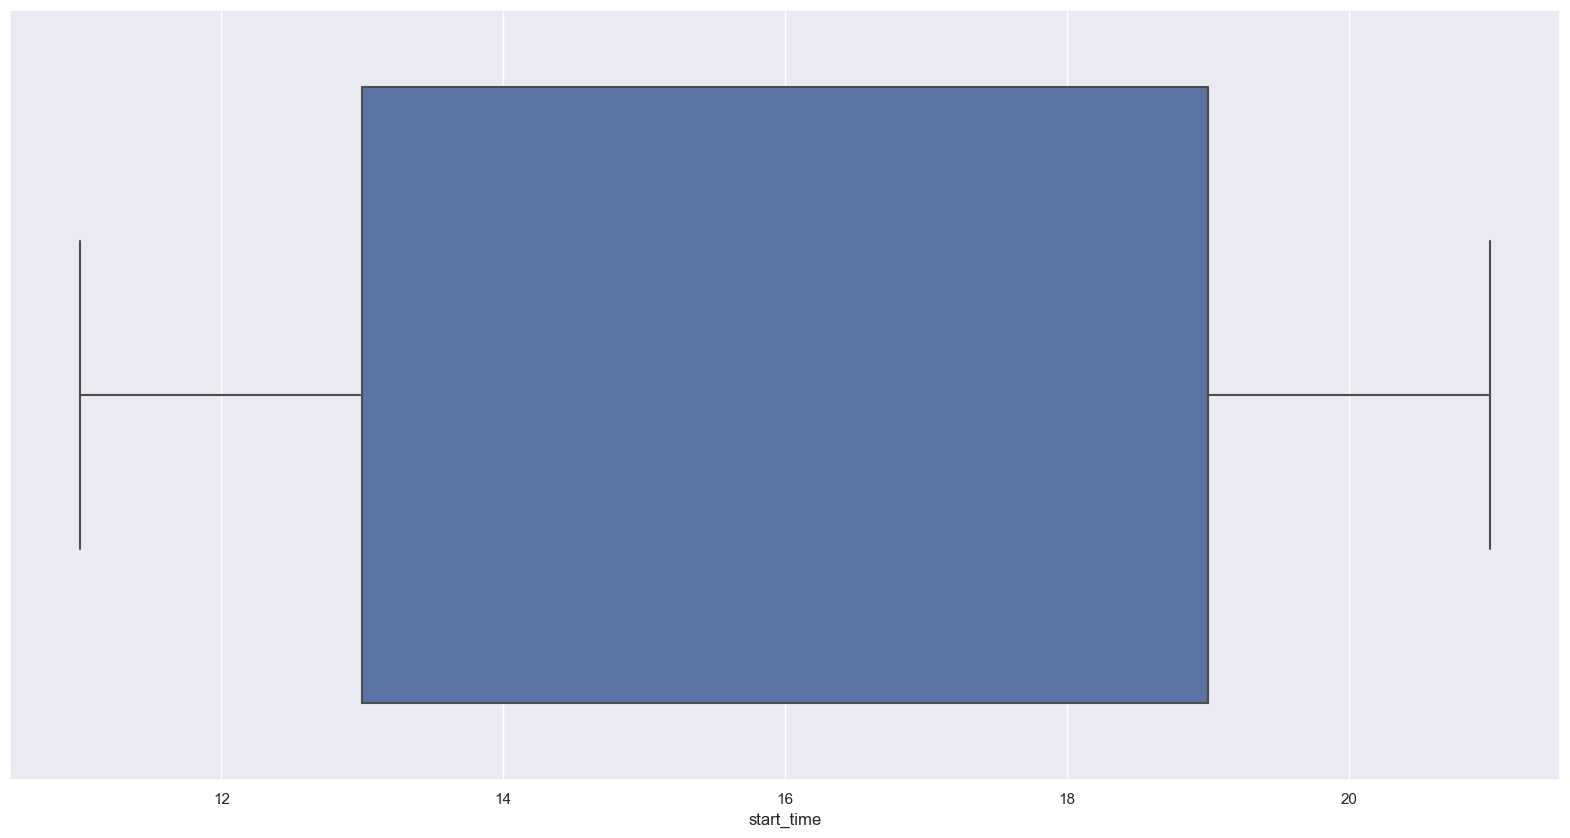

Distribution Analysis - Histogram


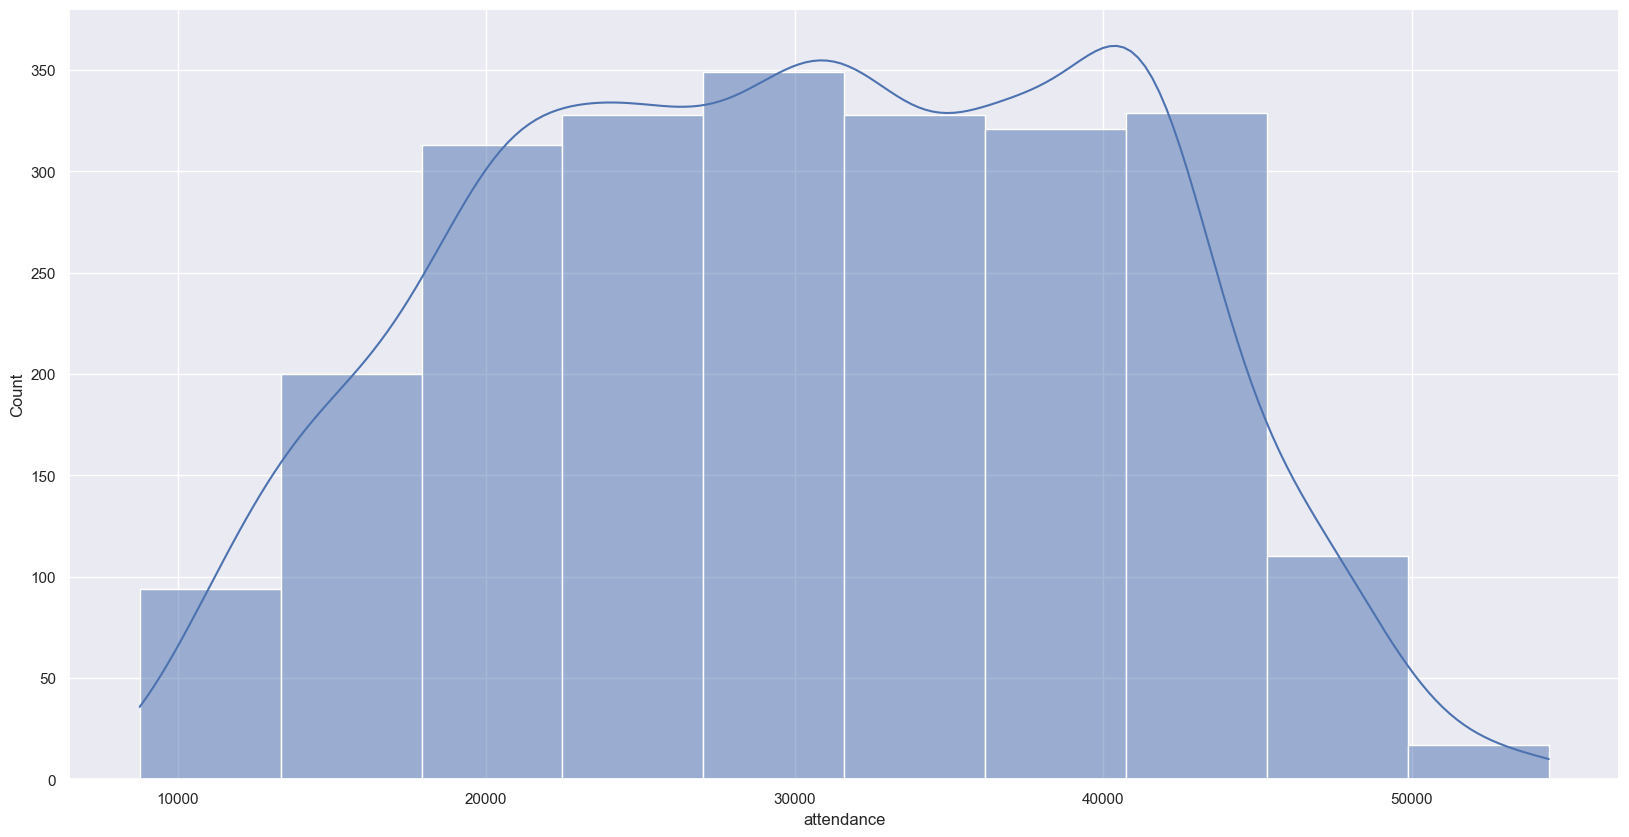

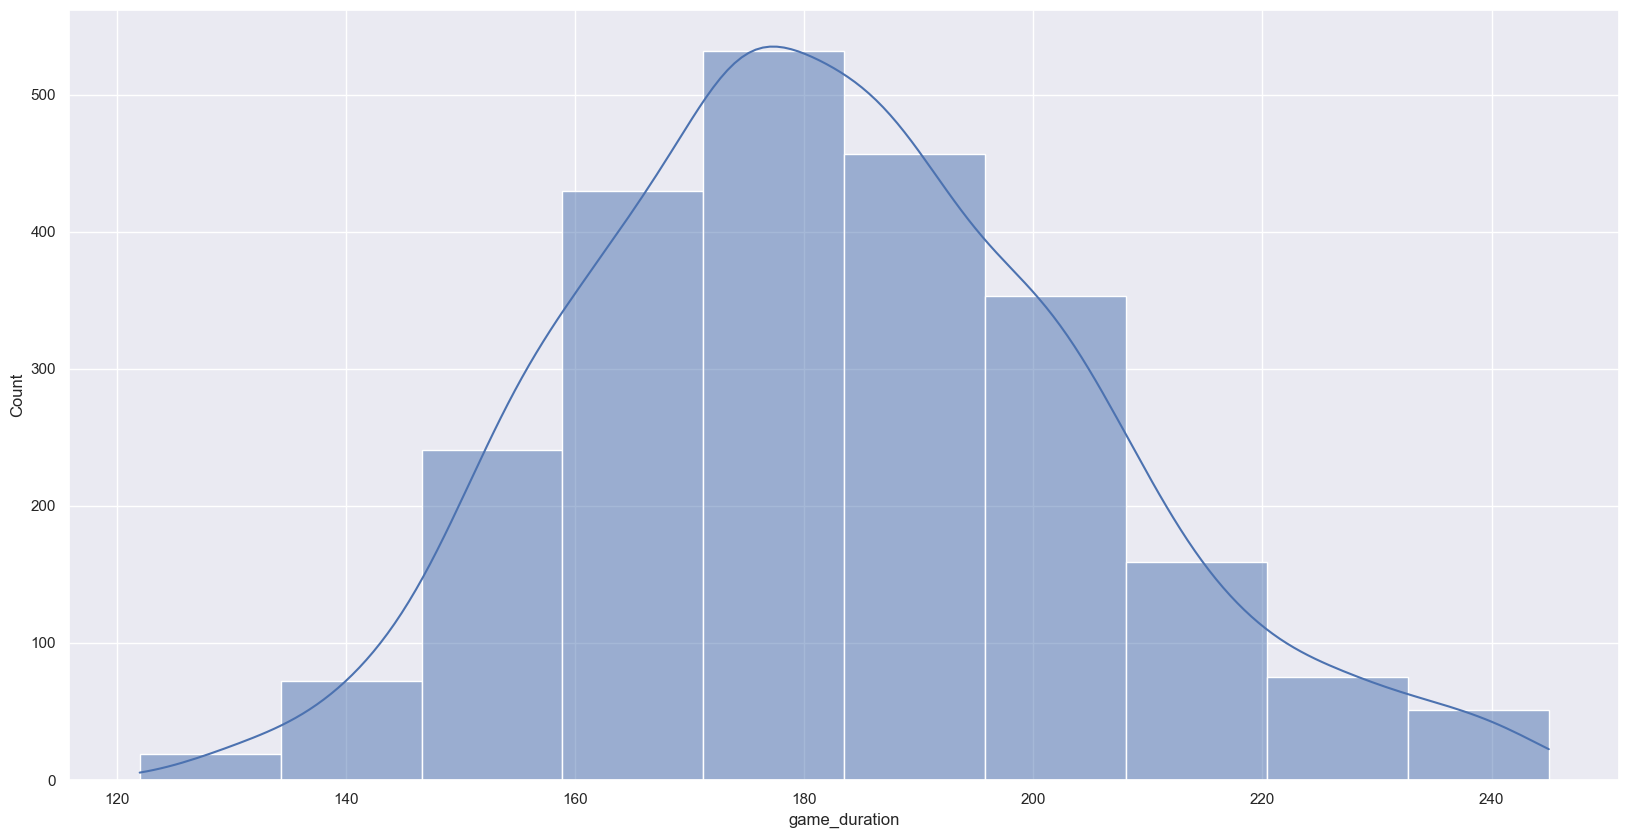

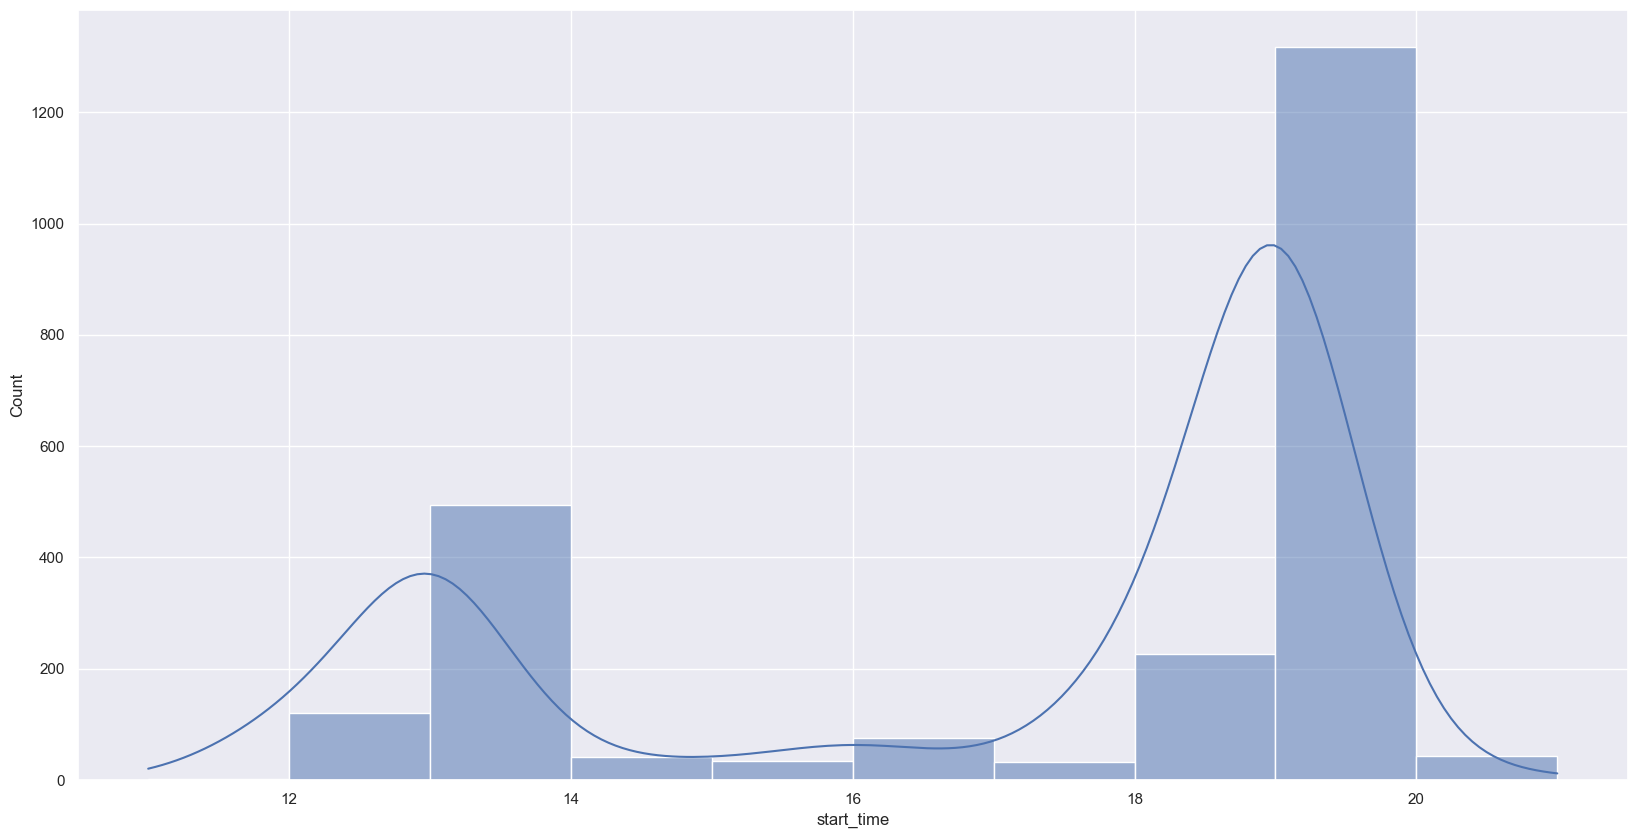

In [218]:
eda_num(baseballdata)

### Variables categoricas aisladas

Bar Plot of game_type


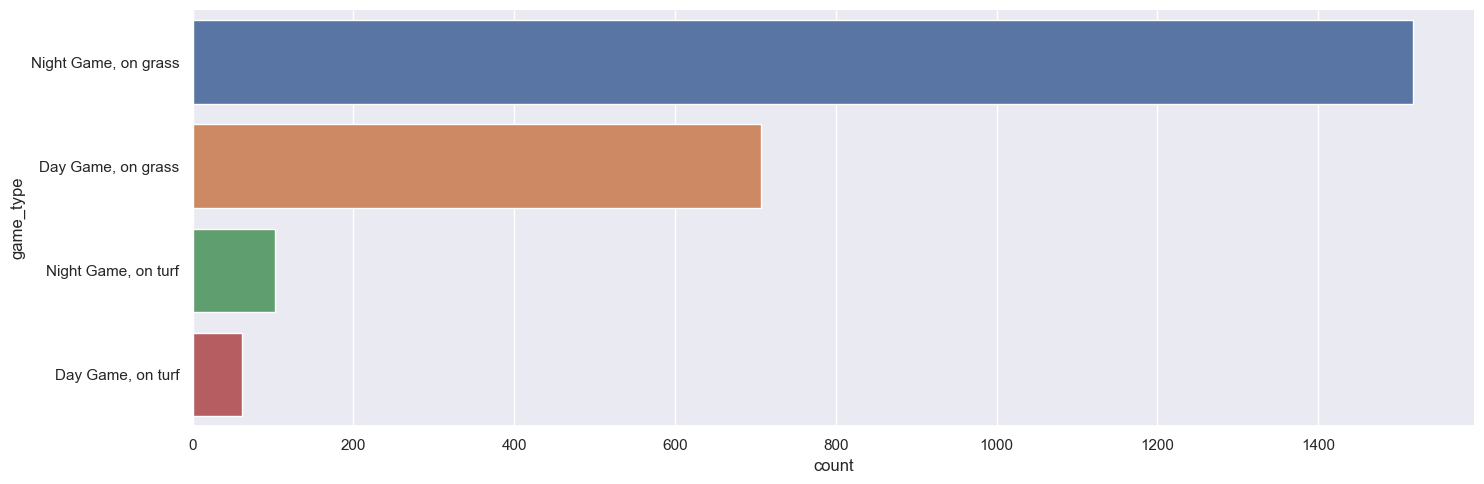

Summary of game_type


,count,relative_pct
"Night Game, on grass",1518,0.64
"Day Game, on grass",707,0.30
"Night Game, on turf",103,0.04
"Day Game, on turf",61,0.03


In [219]:
eda_cat(baseballdata, x = 'game_type')

Bar Plot of date


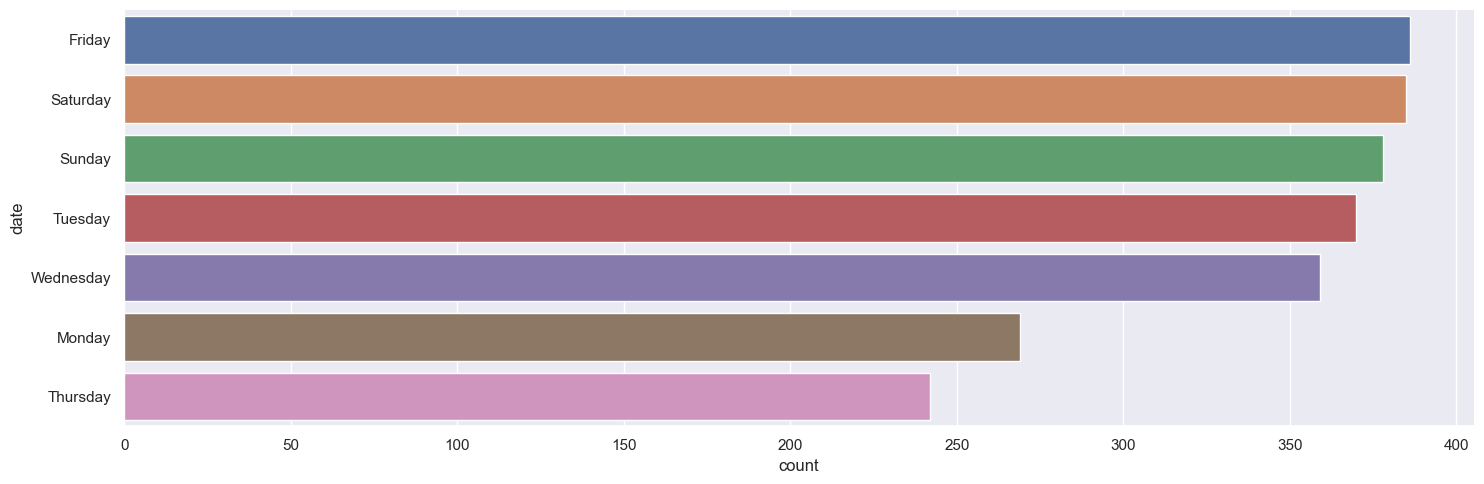

Summary of date


,count,relative_pct
Friday,386,0.16
Saturday,385,0.16
Sunday,378,0.16
Tuesday,370,0.15
Wednesday,359,0.15
Monday,269,0.11
Thursday,242,0.10


In [220]:
eda_cat(baseballdata, x='date')

Bar Plot of start_time


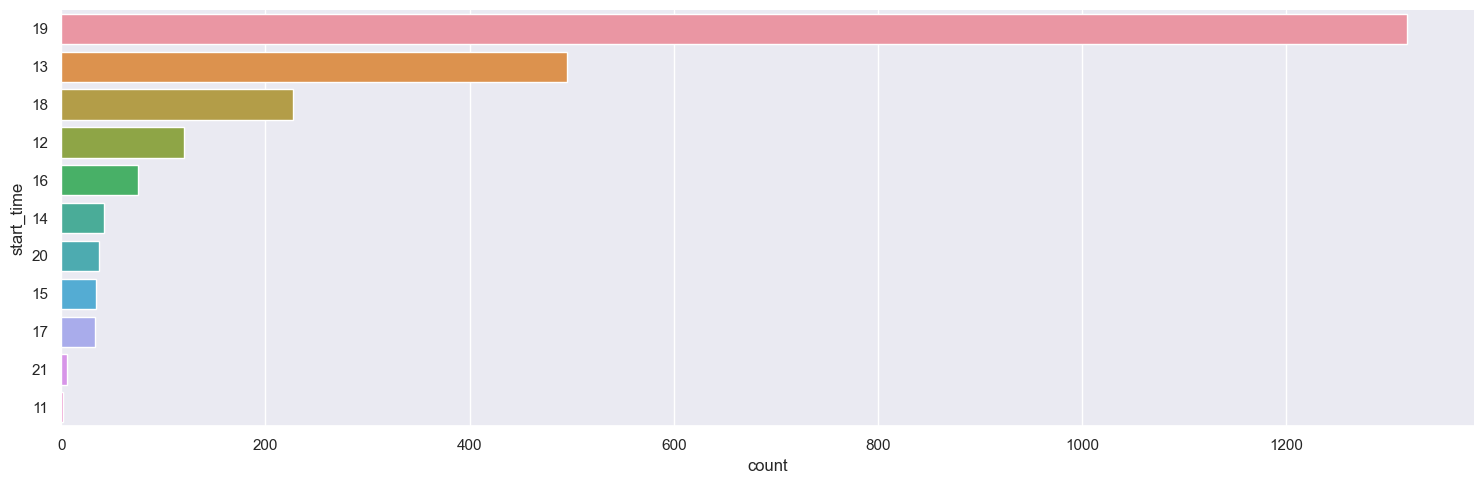

Summary of start_time


,count,relative_pct
19,1318,0.55
13,495,0.21
18,227,0.10
12,120,0.05
16,75,0.03
14,42,0.02
20,37,0.02
15,34,0.01
17,33,0.01
21,6,0.00


In [221]:
eda_cat(baseballdata, x='start_time') 

### Correlacion entre variables categoricas

Bar Plot of start_time with respect to game_type


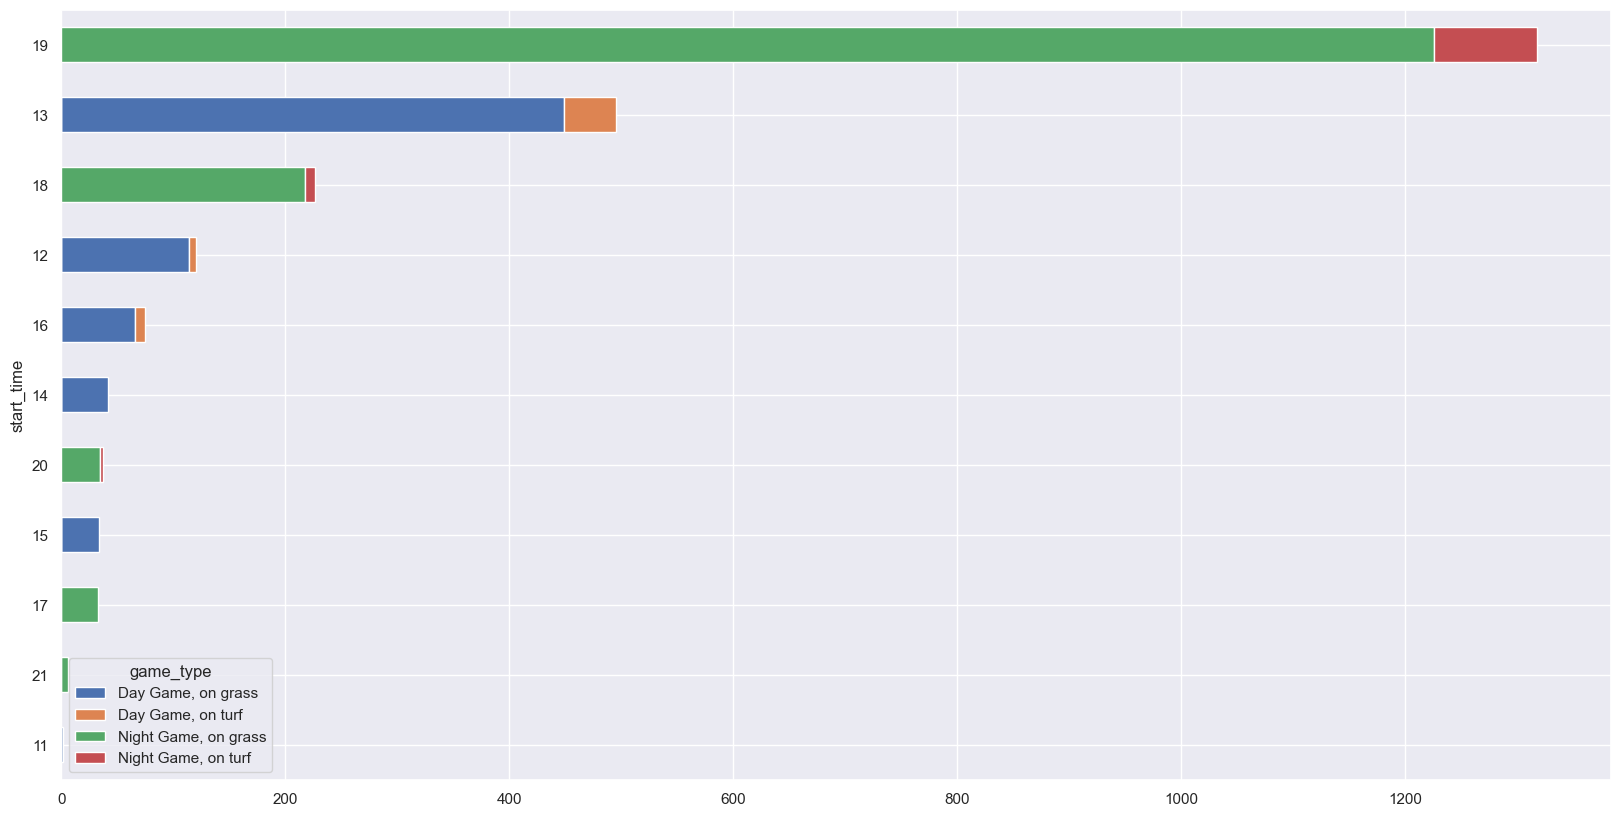

Crosstabulation of start_time across game_type


game_type,"Day Game, on grass","Day Game, on turf","Night Game, on grass","Night Game, on turf"
start_time,,,,
19,0.00,0.00,0.93,0.07
13,0.91,0.09,0.00,0.00
18,0.00,0.00,0.96,0.04
12,0.95,0.05,0.00,0.00
16,0.88,0.12,0.00,0.00
14,1.00,0.00,0.00,0.00
20,0.00,0.00,0.95,0.05
15,1.00,0.00,0.00,0.00
17,0.00,0.00,1.00,0.00


In [222]:
eda_cat(baseballdata, x='start_time', y='game_type')

Bar Plot of home_team with respect to start_time


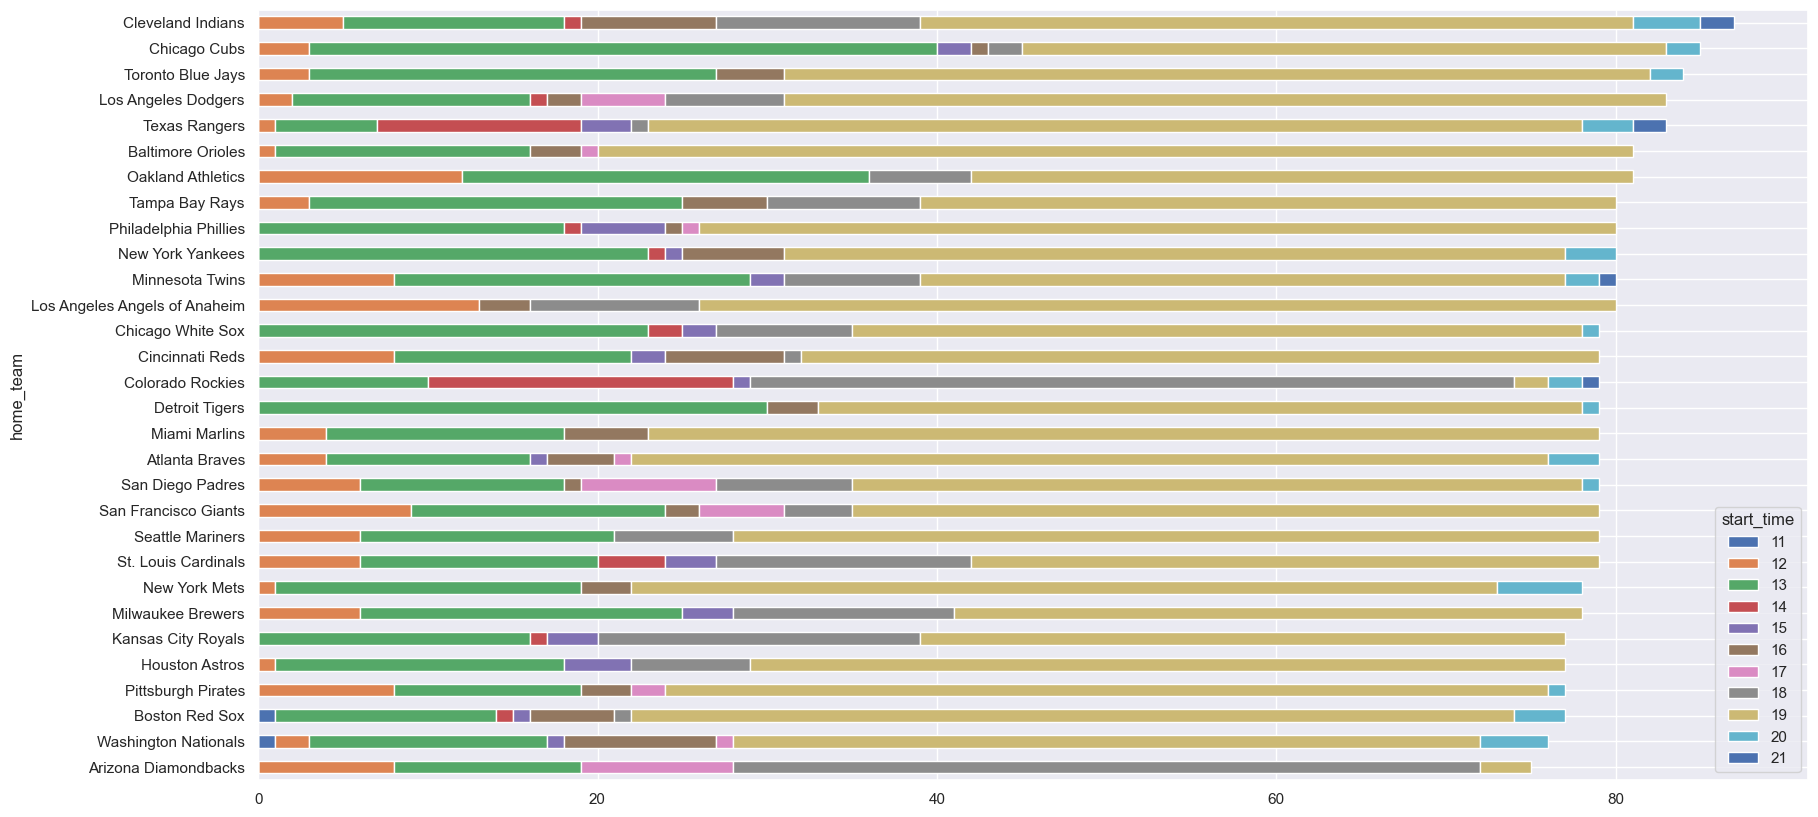

Crosstabulation of home_team across start_time


start_time,11,12,13,14,15,16,17,18,19,20,21
home_team,,,,,,,,,,,
Cleveland Indians,0.00,0.06,0.15,0.01,0.00,0.09,0.00,0.14,0.48,0.05,0.02
Chicago Cubs,0.00,0.04,0.44,0.00,0.02,0.01,0.00,0.02,0.45,0.02,0.00
Toronto Blue Jays,0.00,0.04,0.29,0.00,0.00,0.05,0.00,0.00,0.61,0.02,0.00
Texas Rangers,0.00,0.01,0.07,0.14,0.04,0.00,0.00,0.01,0.66,0.04,0.02
Los Angeles Dodgers,0.00,0.02,0.17,0.01,0.00,0.02,0.06,0.08,0.63,0.00,0.00
Baltimore Orioles,0.00,0.01,0.19,0.00,0.00,0.04,0.01,0.00,0.75,0.00,0.00
Oakland Athletics,0.00,0.15,0.30,0.00,0.00,0.00,0.00,0.07,0.48,0.00,0.00
Minnesota Twins,0.00,0.10,0.26,0.00,0.02,0.00,0.00,0.10,0.48,0.02,0.01
Tampa Bay Rays,0.00,0.04,0.28,0.00,0.00,0.06,0.00,0.11,0.51,0.00,0.00


In [223]:
eda_cat(baseballdata, x='home_team', y='start_time')

Bar Plot of date with respect to start_time


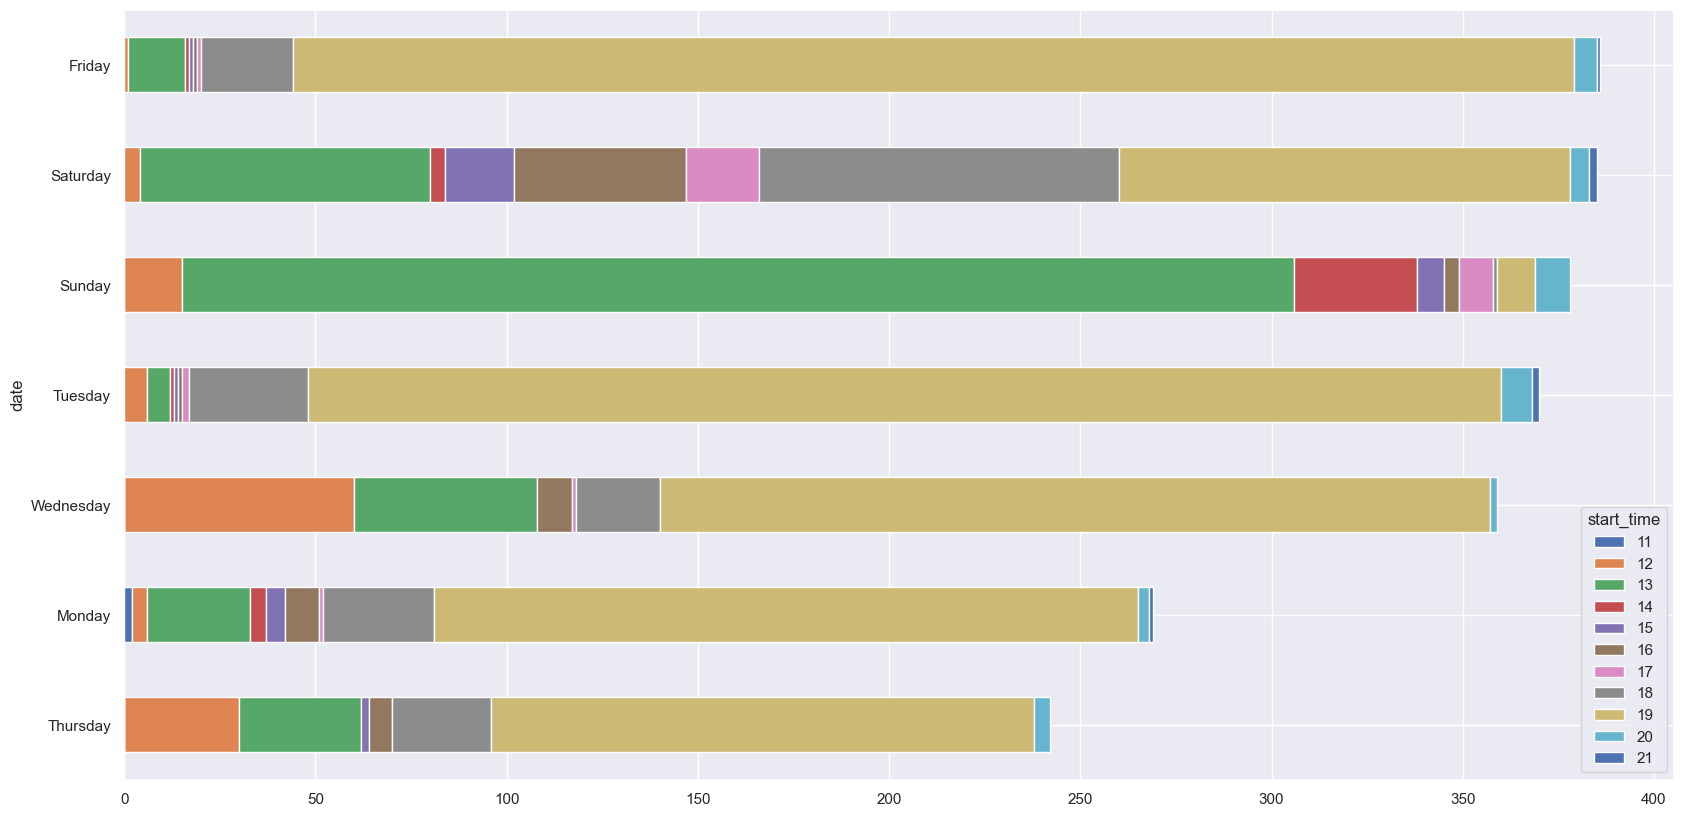

Crosstabulation of date across start_time


start_time,11,12,13,14,15,16,17,18,19,20,21
date,,,,,,,,,,,
Friday,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.06,0.87,0.02,0.00
Saturday,0.00,0.01,0.20,0.01,0.05,0.12,0.05,0.24,0.31,0.01,0.01
Sunday,0.00,0.04,0.77,0.08,0.02,0.01,0.02,0.00,0.03,0.02,0.00
Tuesday,0.00,0.02,0.02,0.00,0.00,0.00,0.01,0.08,0.84,0.02,0.01
Wednesday,0.00,0.17,0.13,0.00,0.00,0.03,0.00,0.06,0.60,0.01,0.00
Monday,0.01,0.01,0.10,0.01,0.02,0.03,0.00,0.11,0.68,0.01,0.00
Thursday,0.00,0.12,0.13,0.00,0.01,0.02,0.00,0.11,0.59,0.02,0.00


In [224]:
eda_cat(baseballdata, x='date', y='start_time')

### Correlacion entre variables numericas

In [225]:
eda_num(baseballdata, method='correlation')

Correlation Analysis - Heatmap


C:\Users\Andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\quickda\explore_numeric.py:28: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\Andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\quickda\explore_numeric.py:30: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



,attendance,game_duration,start_time
attendance,1.00,0.04,-0.10
game_duration,0.04,1.00,0.00
start_time,-0.10,0.00,1.00


Feature Importance in the prediction of attendance


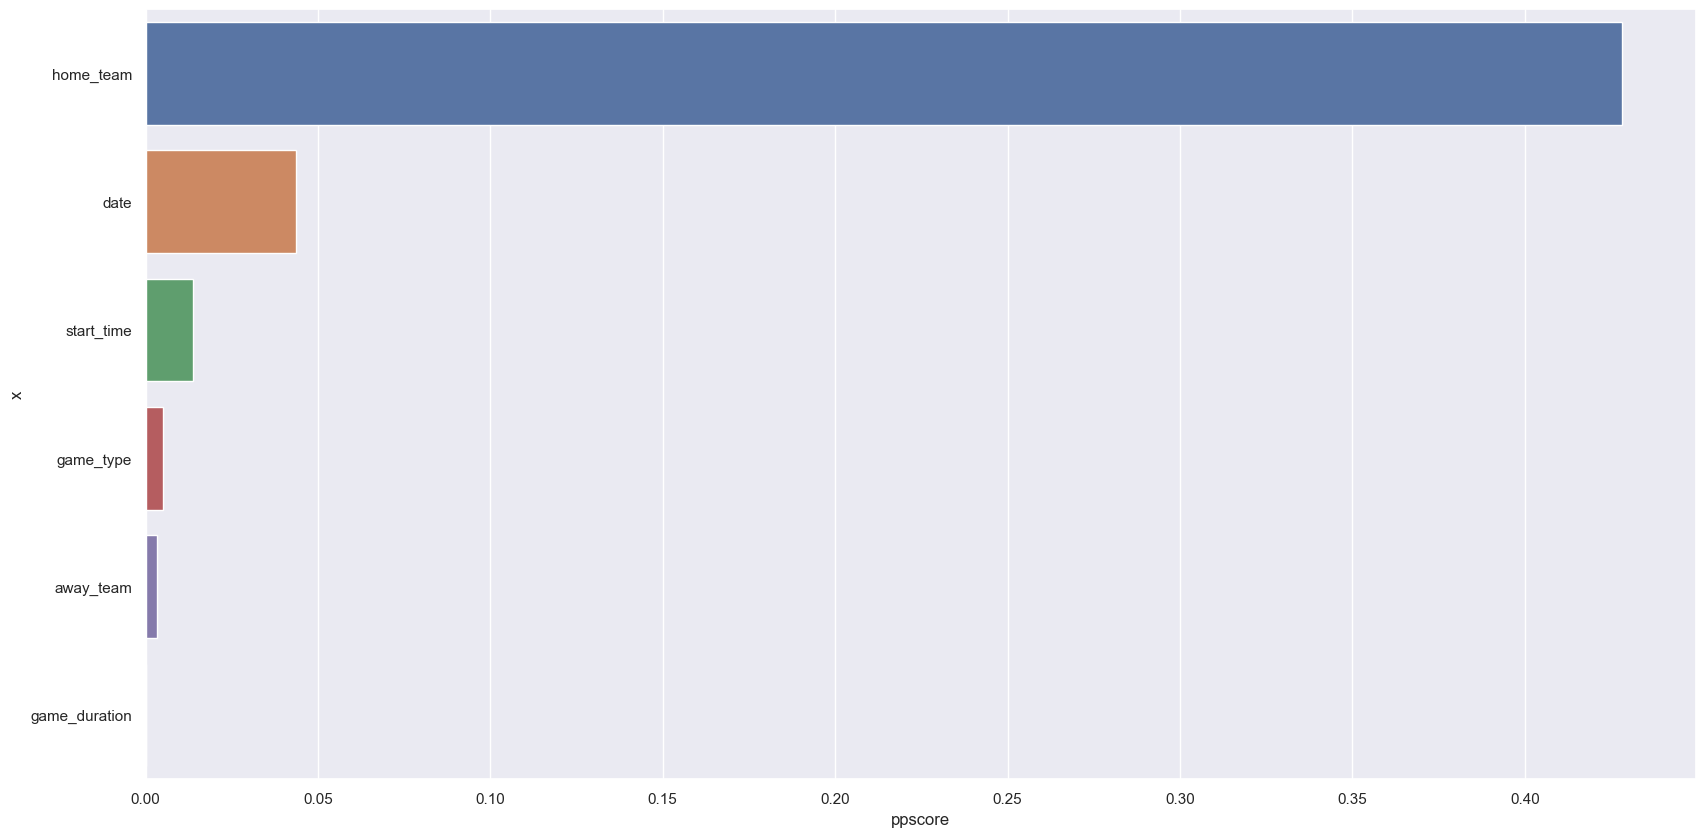

In [226]:

eda_numcat(baseballdata, x='attendance')

Scatterplot of attendance versus game_duration


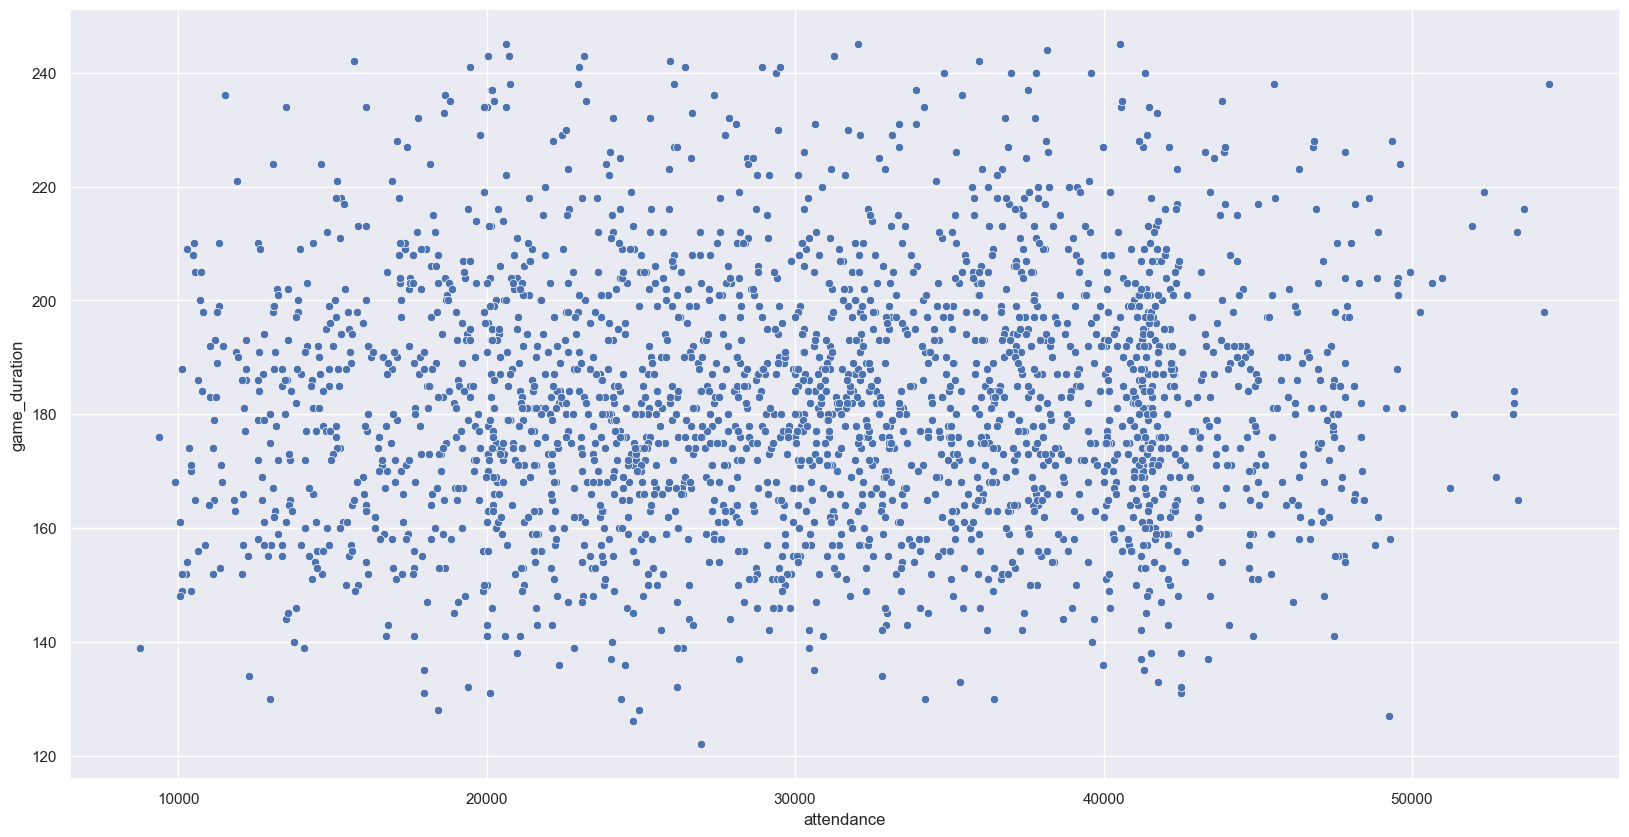

In [227]:
eda_numcat(baseballdata, x="attendance", y="game_duration", method='relationship')

In [265]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

X = baseballdata[['home_team', 'start_time']].copy() #Cat and Num

# print(X)

y = baseballdata['attendance'].values #Attendance

transCol = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse=False), [0])], remainder='passthrough')
X = np.array(transCol.fit_transform(X))


X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(X, y, test_size = 0.2, random_state = 0)

C:\Users\Andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [266]:
from sklearn.linear_model import LinearRegression
regresor = LinearRegression()
regresor.fit(X_entreno, y_entreno)

LinearRegression()

In [267]:
y_pred = regresor.predict(X_prueba)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_prueba.reshape(len(y_prueba),1)),1))

[[23488. 28345.]
 [21280. 14798.]
 [33556. 32407.]
 [26124. 44956.]
 [24640. 18339.]
 [24684. 23367.]
 [23036. 26607.]
 [21564. 17302.]
 [45968. 43957.]
 [40792. 41959.]
 [15840. 25883.]
 [26880. 42038.]
 [27396. 33747.]
 [36292. 41576.]
 [22476. 21137.]
 [45968. 44112.]
 [30396. 24981.]
 [21280. 23054.]
 [26868. 20022.]
 [33556. 25804.]
 [41116. 45501.]
 [27396. 20519.]
 [29352. 33029.]
 [32140. 36527.]
 [36556. 37767.]
 [32140. 21891.]
 [17564. 25182.]
 [22476. 18140.]
 [30632. 29386.]
 [26124. 24226.]
 [28616. 30085.]
 [45968. 52728.]
 [39252. 40434.]
 [30396. 37447.]
 [37660. 37254.]
 [26124. 32174.]
 [26512. 15434.]
 [36556. 37739.]
 [27064. 18873.]
 [43208. 47608.]
 [27144. 19283.]
 [17564. 10478.]
 [36292. 39077.]
 [36556. 37661.]
 [24144. 19597.]
 [27824. 30074.]
 [27512. 20976.]
 [30396. 32526.]
 [22716. 22786.]
 [36636. 27531.]
 [27512. 36663.]
 [33244. 24678.]
 [26124. 20387.]
 [34084. 29330.]
 [31216. 33546.]
 [41160. 41635.]
 [21936. 23963.]
 [29076. 37484.]
 [41736. 40994

In [269]:
score = regresor.score(X_prueba, y_prueba)
print("R^2 score:", score)

print(regresor.coef_)
print(regresor.intercept_)

R^2 score: 0.6049289484667572
[-3.11e+16 -3.11e+16 -3.11e+16 -3.11e+16 -3.11e+16 -3.11e+16 -3.11e+16
 -3.11e+16 -3.11e+16 -3.11e+16 -3.11e+16 -3.11e+16 -3.11e+16 -3.11e+16
 -3.11e+16 -3.11e+16 -3.11e+16 -3.11e+16 -3.11e+16 -3.11e+16 -3.11e+16
 -3.11e+16 -3.11e+16 -3.11e+16 -3.11e+16 -3.11e+16 -3.11e+16 -3.11e+16
 -3.11e+16 -3.11e+16 -3.68e+02]
3.1062225395847264e+16
